In [1]:
#Imports

from PictogramGrid import Pictogram,Page,Grid
from EvaluationGrid import grid_distance_cost,sentence_distance_cost,grid_cost
from gpgo import gpgo,load_gpgo
import os
import json
import codecs
import pandas as pd
import matplotlib.pyplot as plt
from EvaluationGrid import grid_cost

### Dataset loading

In [2]:
#Corpus initialization
corpus = []
paths = ["./training_corpora"]

#Corpus fetching
for path in paths:
    for root, dirs, files in os.walk(path):
        for name in files:
            corpus.append(os.path.join(root,name))

### Grid Generation and Optimization

In [3]:
my_gpgo = load_gpgo(corpus,corpus,"config/default.yaml")
g,_ = my_gpgo.genetic_algorithm()

Process : 0: 100%|█████████████████████████████████████████████████████████| 2000/2000 [12:13<00:00,  2.73generation/s]


================GRID================

ROOT PAGE :  accueil
accueil
  |_default0
  |_default1
  |_default2
  |_default3


================PAGES===============

accueil (5x5) , 25 pictograms
default0 (5x5) , 25 pictograms
default1 (5x5) , 25 pictograms
default2 (5x5) , 25 pictograms
default3 (5x5) , 25 pictograms



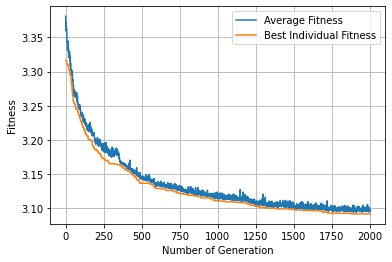

In [11]:
g.to_csv()
g.display_information()


#Plot the history
avg = my_gpgo.fitness_history("average")
best = my_gpgo.fitness_history("only_best")
gen_best = my_gpgo.fitness_history("gen_best")

plt.plot(avg,label = "Average Fitness")
plt.plot(best,label = "Best Individual Fitness")

plt.xlabel("Number of Generation")
plt.ylabel("Fitness")
plt.legend()
plt.grid()
plt.show()

### Grid Loading

In [5]:
#Loading the PODD and the optimized grid (from TCOF dataset)
podd = Grid("podd.csv",synonyms_file = "podd_syn.json")
tcof = Grid("default.csv")

podd_infos = [podd.nb_picto,len(podd.pages)]
tcof_infos = [tcof.nb_picto,len(tcof.pages)]

print("PODD - Number of pictos :",podd_infos[0],"   Number of pages : ",podd_infos[1])
print("EXP - Number of pictos :",tcof_infos[0],"   Number of pages : ",tcof_infos[1])

PODD - Number of pictos : 1398    Number of pages :  114
EXP - Number of pictos : 125    Number of pages :  5


   ### Cost Computation

In [6]:
#Cost computation
s = "moi voir hier chat vouloir manger souris"
podd_cost,podd_mm,miss_list,podd_stats = grid_distance_cost(podd,corpus,synonyms_file = "podd_syn.json",missmatch_mode = True)

#Print PODD results
print("PODD - Cost :",podd_cost,"    Missmatches :",podd_mm)
print("Words not in the PODD :")
print(miss_list)
tcof_cost,tcof_mm,_,tcof_stats = grid_distance_cost(tcof,corpus,synonyms_file = None,
                                                    missmatch_mode = True,stopwords = miss_list)

#Print TCOF results
print("EXP - Cost :",tcof_cost,"    Missmatches :",tcof_mm)


PODD - Cost : 1067.3095658877542     Missmatches : 232
Words not in the PODD :
{'mammifere', 'a', 'ne', 'oiseaux', 'et', 'bout', 'quadripede', 'panda', 'terrestre', 'gorille', 'mange', 'mer', 'comme', 'mais', 'sur', 'banquise', 'est', 'marin', 'douce', 'morceau', 'dans', 'la', 'du', 'trop', 'froide', 'vit', 'carnivore', 'serpent', 'vole', 'une', 'les', 'pingouin', 'crabe', 'sans', 'savane', 'content', 'feuilles', 'se', 'glisser', 'bananes', 'grande', 'crustacé', 'aime', 'pour', 'le', 'joueuse', 'animal', 'aimerait', 'crocodile', 'en', 'gazelle', 'de', 'perroquet', 'etre', 'peut', 'lionne', 'domestique', 'des', 'chasse', 'glace', 'sauvage', 'engloutir', 'sont', 'faim', 'pas', 'reptiles', 'nourrit', 'fromage', 'bamboo', 'car', 'observe', 'veut', 'rongeur', 'jungle', 'loutre'}
EXP - Cost : 430.52606069912935     Missmatches : 0


### Results

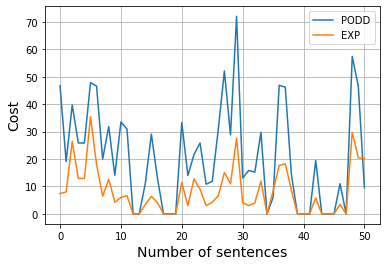

In [7]:
plt.plot(podd_stats[0],label = "PODD")
plt.plot(tcof_stats[0],label = "EXP")
plt.xlabel("Number of sentences", size=14)
plt.ylabel("Cost", size=14)
plt.legend()
plt.grid()
plt.show()